In [3]:
# DBSCAN clustering con reducción de dimensionalidad usando t-SNE
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D


%load_ext kedro.ipython

df = catalog.load("data_final")

[11/24/25 17:36:38] INFO     Using                                                                  ]8;id=621954;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=394631;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Li                
                             b\site-packages\kedro\framework\project\rich_logging.yml' as logging                  
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=949576;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=444728;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=888142;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=75937;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=791394;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=733396;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\proyecto                
                             -ml.                                                                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/24/25 17:36:43] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=545660;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=843609;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/24/25 17:36:44] INFO     Kedro project proteyecto-ml                                            ]8;id=230243;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=118429;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=58759;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=7534;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[11/24/25 17:36:47] INFO     Registered line magic 'run_viz'                                        ]8;id=654661;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=26875;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

[11/24/25 17:36:48] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=851694;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=184399;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Varianza explicada por PCA:
[0.05493688 0.04904072]
Varianza total explicada: 10.40%

=== MÉTRICAS DE CLUSTERING (DBSCAN + PCA 2D) ===
Silhouette Score:        0.9279
Davies-Bouldin Index:    0.1361
Calinski-Harabasz Index: 258872.47

=== MÉTRICAS DE CLUSTERING (DBSCAN + PCA 2D) ===
Silhouette Score:        0.9279
Davies-Bouldin Index:    0.1361
Calinski-Harabasz Index: 258872.47


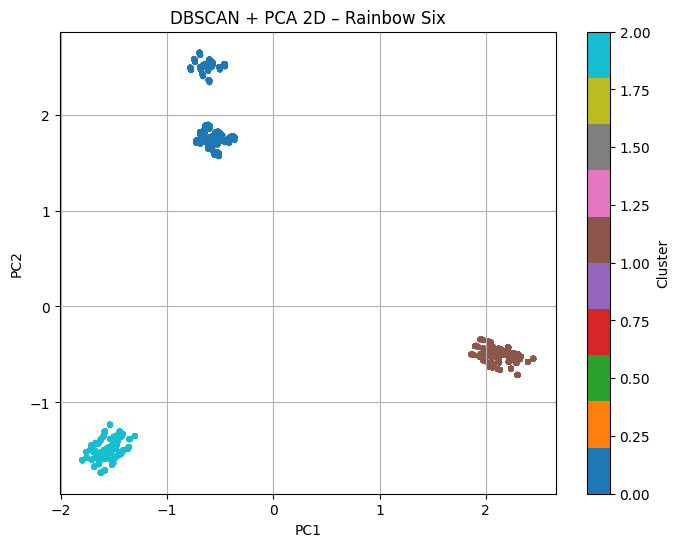

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder


df_limite = df.head(7000).copy()

# 1. Selección de variables

X = df_limite[['mapname', 'operator', 'primaryweapon']]


# 2. One-Hot Encoding

encoder = OneHotEncoder(sparse_output=True)
X_enc = encoder.fit_transform(X)


# 3. StandardScaler (compatible con sparse)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_enc)


# 4. PCA 2D

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled.toarray())

print("Varianza explicada por PCA:")
print(pca.explained_variance_ratio_)
print(f"Varianza total explicada: {pca.explained_variance_ratio_.sum()*100:.2f}%")


# 5. DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=8)
labels = dbscan.fit_predict(X_pca)

df_limite["cluster"] = labels


# 6. Métricas (excluyendo ruido)

mask = labels != -1

silhouette = silhouette_score(X_pca[mask], labels[mask])
dbi = davies_bouldin_score(X_pca[mask], labels[mask])
ch = calinski_harabasz_score(X_pca[mask], labels[mask])

print("\n=== MÉTRICAS DE CLUSTERING (DBSCAN + PCA 2D) ===")
print(f"Silhouette Score:        {silhouette:.4f}")
print(f"Davies-Bouldin Index:    {dbi:.4f}")
print(f"Calinski-Harabasz Index: {ch:.2f}")


# 7. Gráfico PCA 2D coloreado por clusters

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=10)
plt.title("DBSCAN + PCA 2D – Rainbow Six")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [53]:

mask = labels != -1  # quitar ruido
sil = silhouette_score(X_pca[mask], labels[mask])
dbi = davies_bouldin_score(X_pca[mask], labels[mask])
ch = calinski_harabasz_score(X_pca[mask], labels[mask])

print("Silhouette:", sil)
print("Davies-Bouldin:", dbi)
print("Calinski-Harabasz:", ch)


Silhouette: 0.24553032791998056
Davies-Bouldin: 0.9187792681688389
Calinski-Harabasz: 160.6812646845227
